In [4]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import utils

### Overview

This notebook uses the datafiles generated from the preprocessing notebook. The purpose of this notebook is to explore different models efficiently to see 

The tool used is Dataiku which is a autoML tool that allows for the rapid exploration of different ML models. This initial downselection can provide insights into which models might work well.

7. Use Dataiku to explore models for nontime features
8. Use Dataiku to explore models for 1day features
9. Use Dataiku to explore models for 2day features
10. Look into classification analysis for the best regression model - 2 day model


## Initial search with Dataiku AutoML feature 

* 5 fold cross validation on training data only
* grid search on set of standard hyper parameters
* standard scaling all features
* impute all features using the mean value of each corresponding column
* assess models based on MSE/R2 (standard regression problem)

https://www.dataiku.com/

## 7. Use Dataiku to explore models for nontime features


In [5]:
df_train_nontime = pd.read_csv('data/df_train_nontime.csv')
df_train_1day = pd.read_csv('data/df_train_1day.csv')
df_train_2day = pd.read_csv('data/df_train_2day.csv')

#### setup

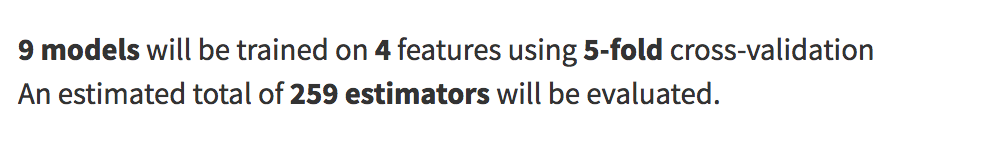

In [6]:
from IPython.display import Image
Image(filename = 'img/dataiku_nontime_setup.png', width = 500)

### Results

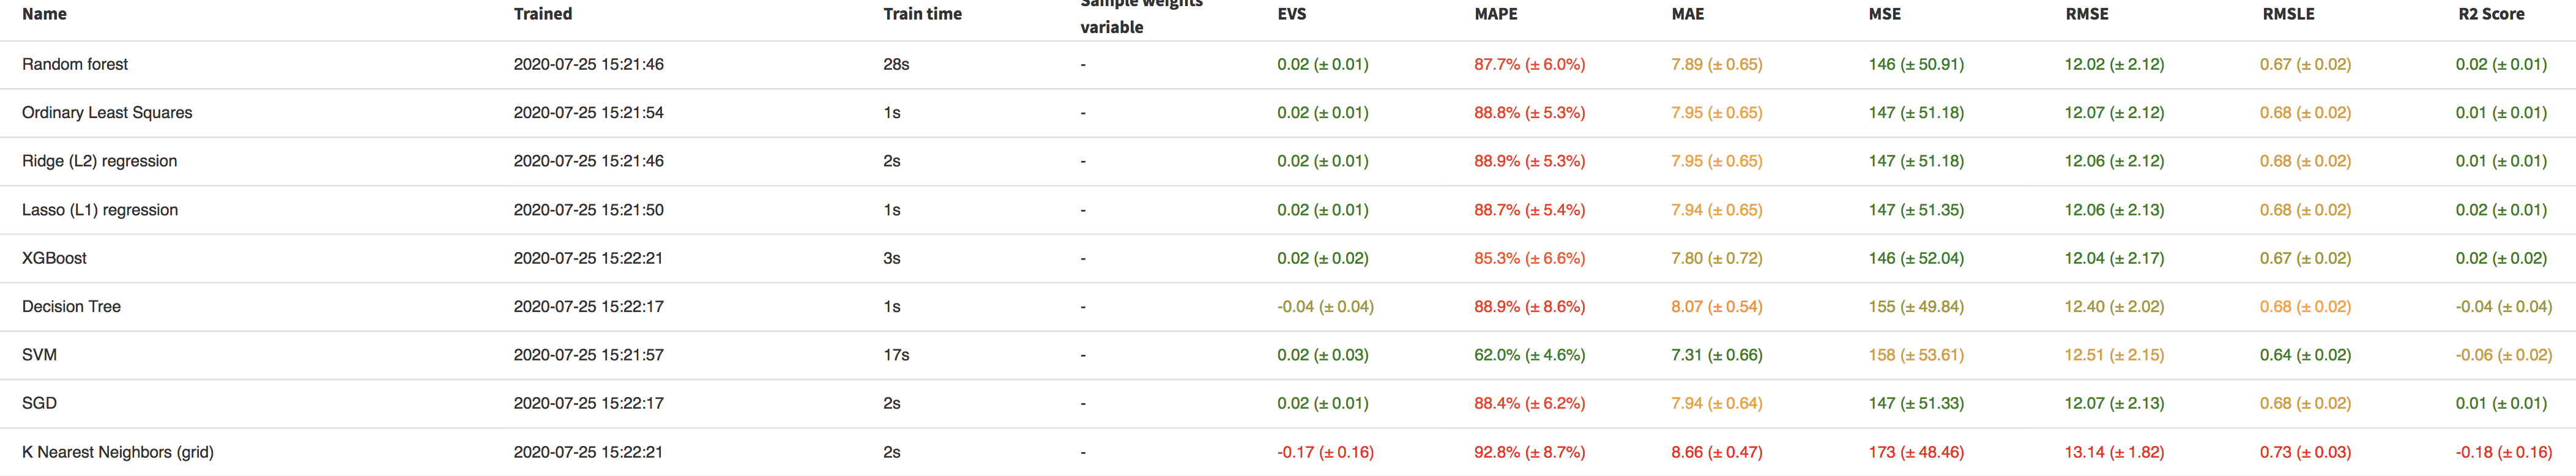

In [7]:
Image(filename = 'img/dataiku_nontime_results.png', width = 1800)

## Model selection and Feature importance

Best model is random forest with RMSE of 12.02 and R2 of .02

Random forest feature importance

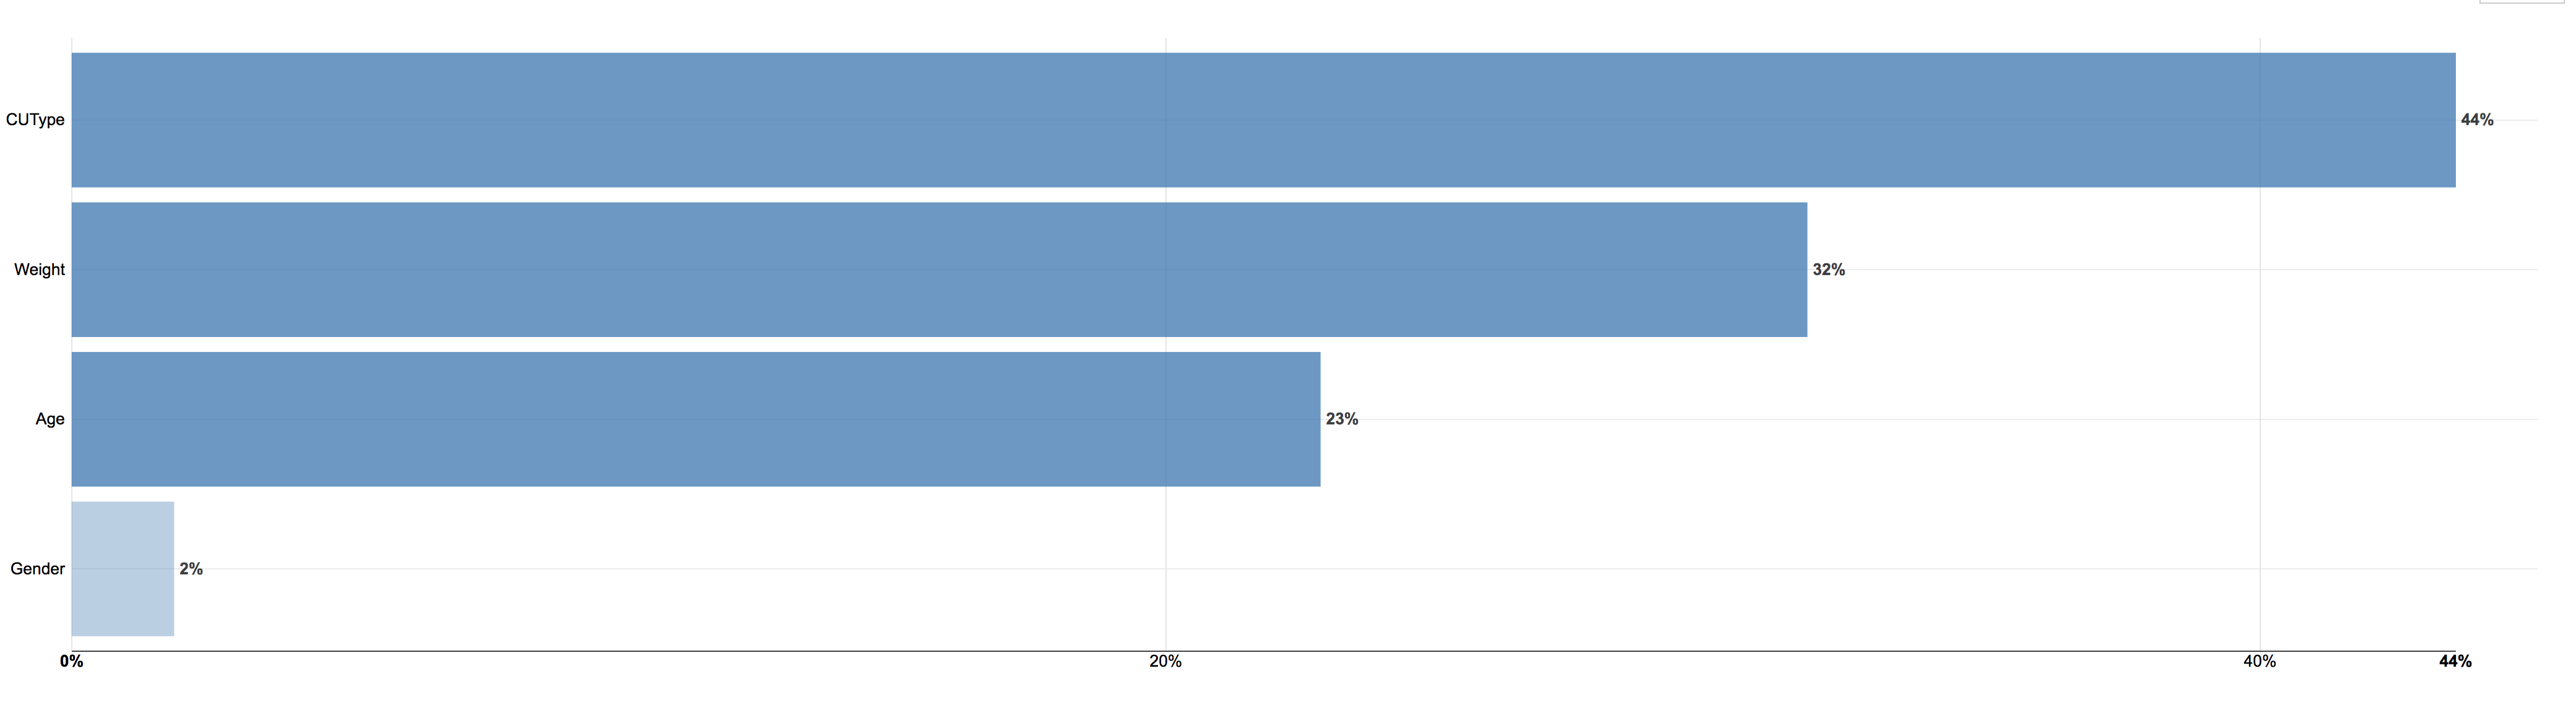

In [8]:
Image(filename = 'img/dataiku_nontime_features.png', width = 1000)

Random forest predicted vs actual scatter plot

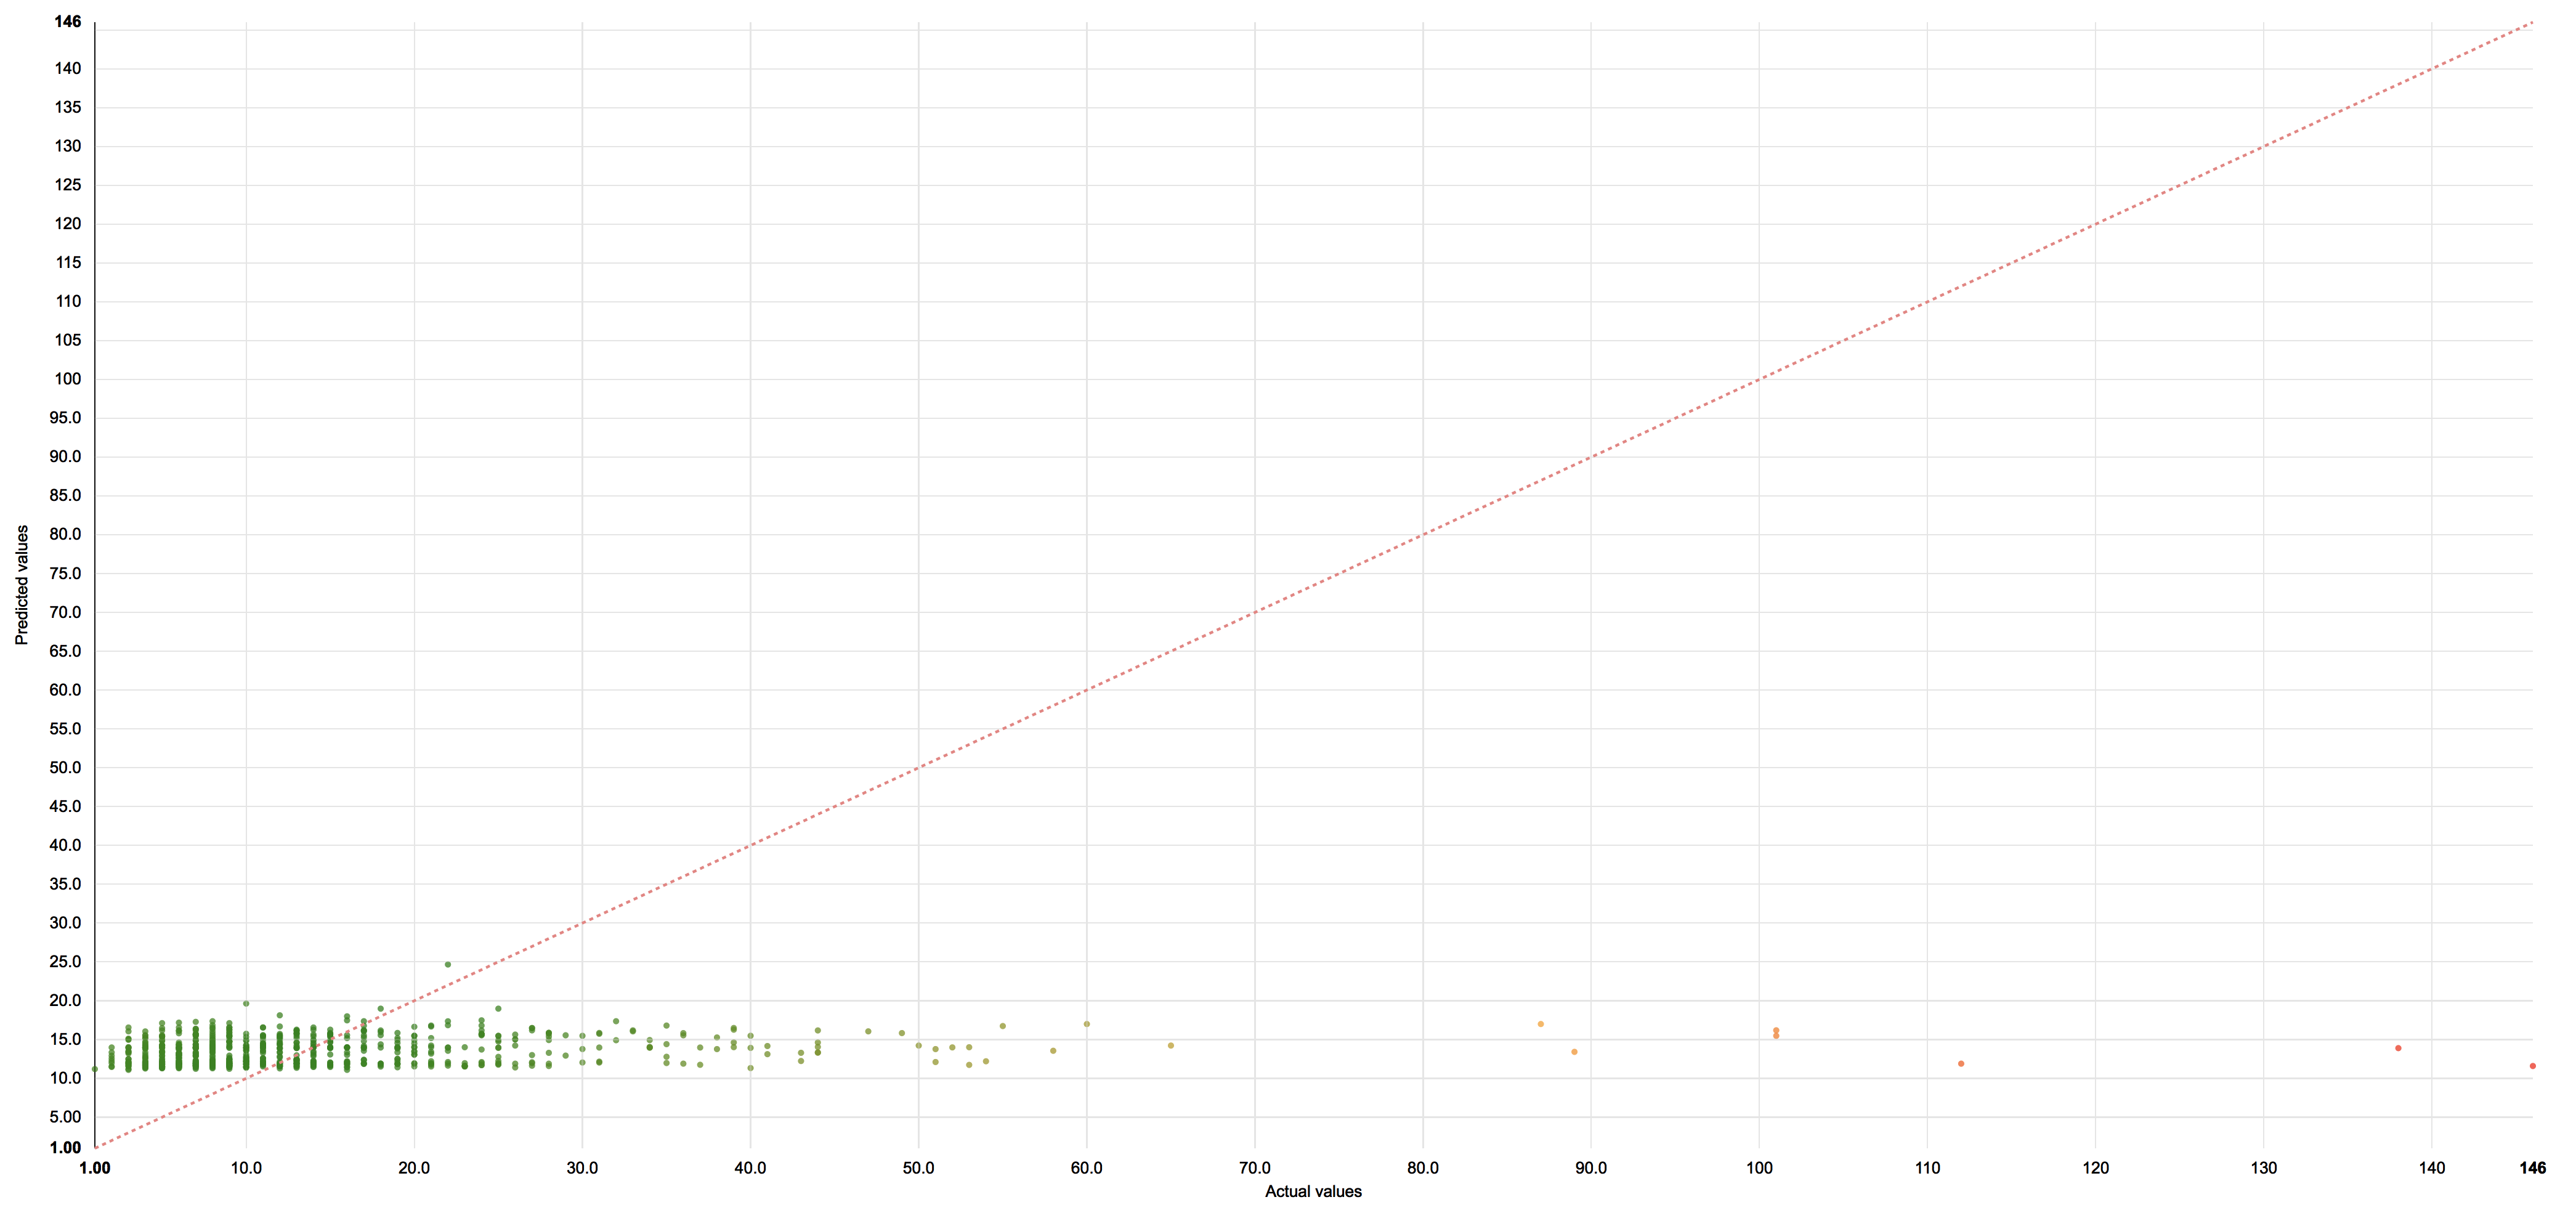

In [9]:
Image(filename = 'img/dataiku_nontime_scatter.png', width = 1000)

### Nontime model discussion
* predicted range is low - only between 10 to 25 - model cannot extrapolate to additional ranges
* non time model features are not very powerful in predicting length of stay
* most important features is CU Type and weight which makes logical sense
* I would not recommend using this model due to poor performance

### validate dataiku results by replicating best nontime model with sklearn - using hyper parameters extract from dataiku

In [10]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

In [12]:
X_train_nontime = df_train_nontime.drop(['Length_of_stay','Above_2_weeks'],axis = 1)
y_train_nontime = df_train_nontime['Length_of_stay']

In [17]:
nontime_pipeline = Pipeline(steps =[('imputer', SimpleImputer()), ('rf', RandomForestRegressor(n_estimators = 30, max_depth = 3))])
cv = StratifiedKFold(n_splits = 5, shuffle = True)
cv_results = cross_validate(nontime_pipeline, X_train_nontime, y_train_nontime, cv = cv, scoring = ['neg_mean_squared_error', 'r2'])

/Users/x006814/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [18]:
print('training 5 fold cv root mean squared error is {:.2f}'.format(np.sqrt(-np.mean(cv_results['test_neg_mean_squared_error']))))
print('training 5 fold cv r2 is {:.3f}'.format(np.mean(cv_results['test_r2'])))

training 5 fold cv root mean squared error is 12.07
training 5 fold cv r2 is 0.022


## 8. Use Dataiku to explore models for 1day features


#### setup

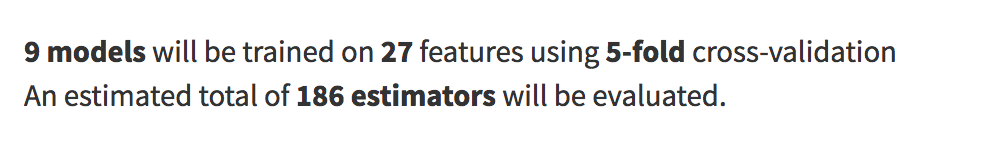

In [19]:
from IPython.display import Image
Image(filename = 'img/dataiku_1day_setup.png', width = 500)

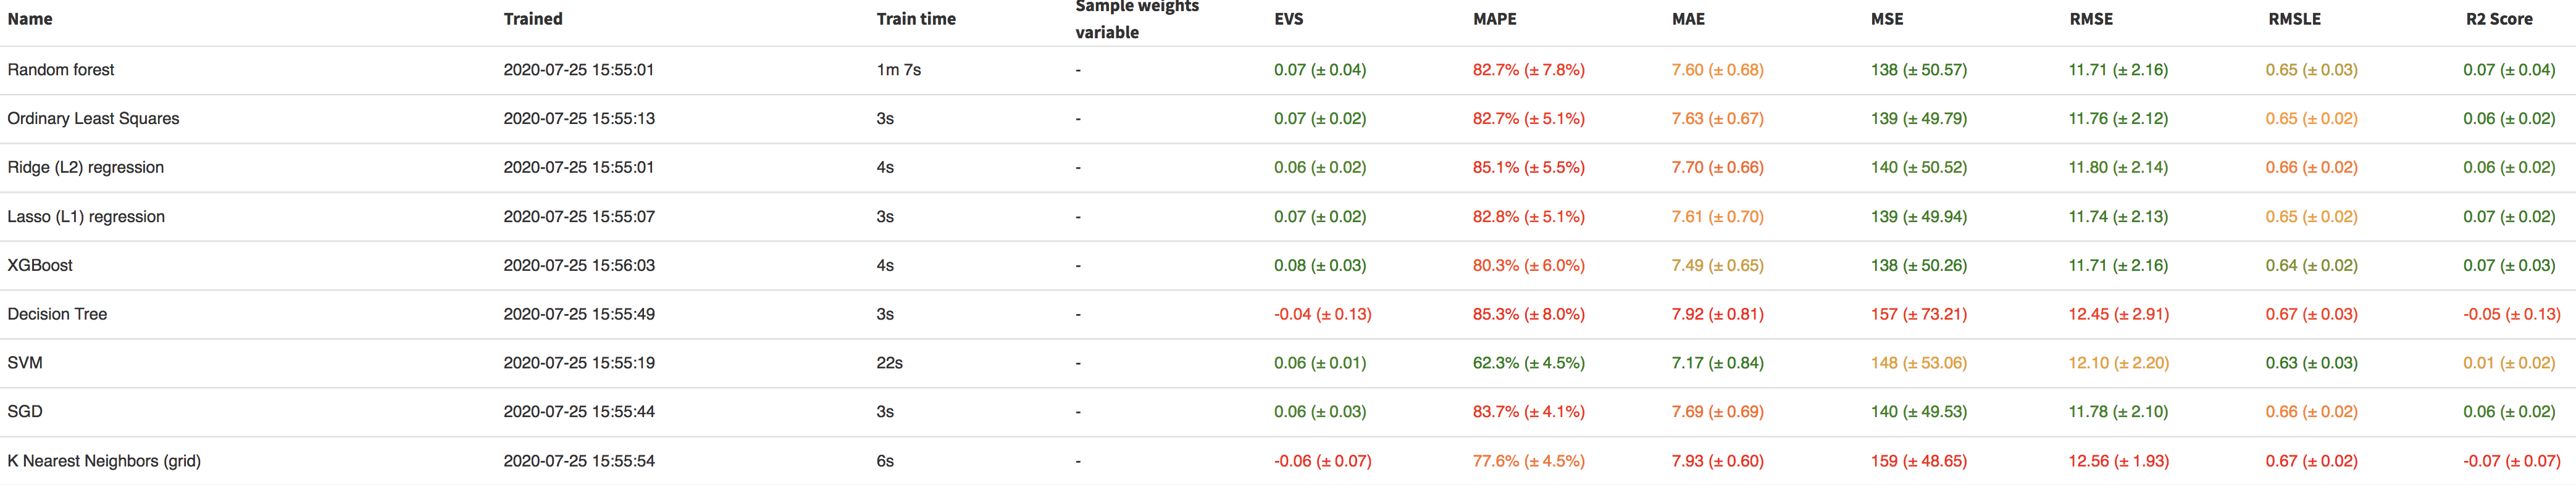

In [20]:
Image(filename = 'img/dataiku_1day_results.png', width = 1800)

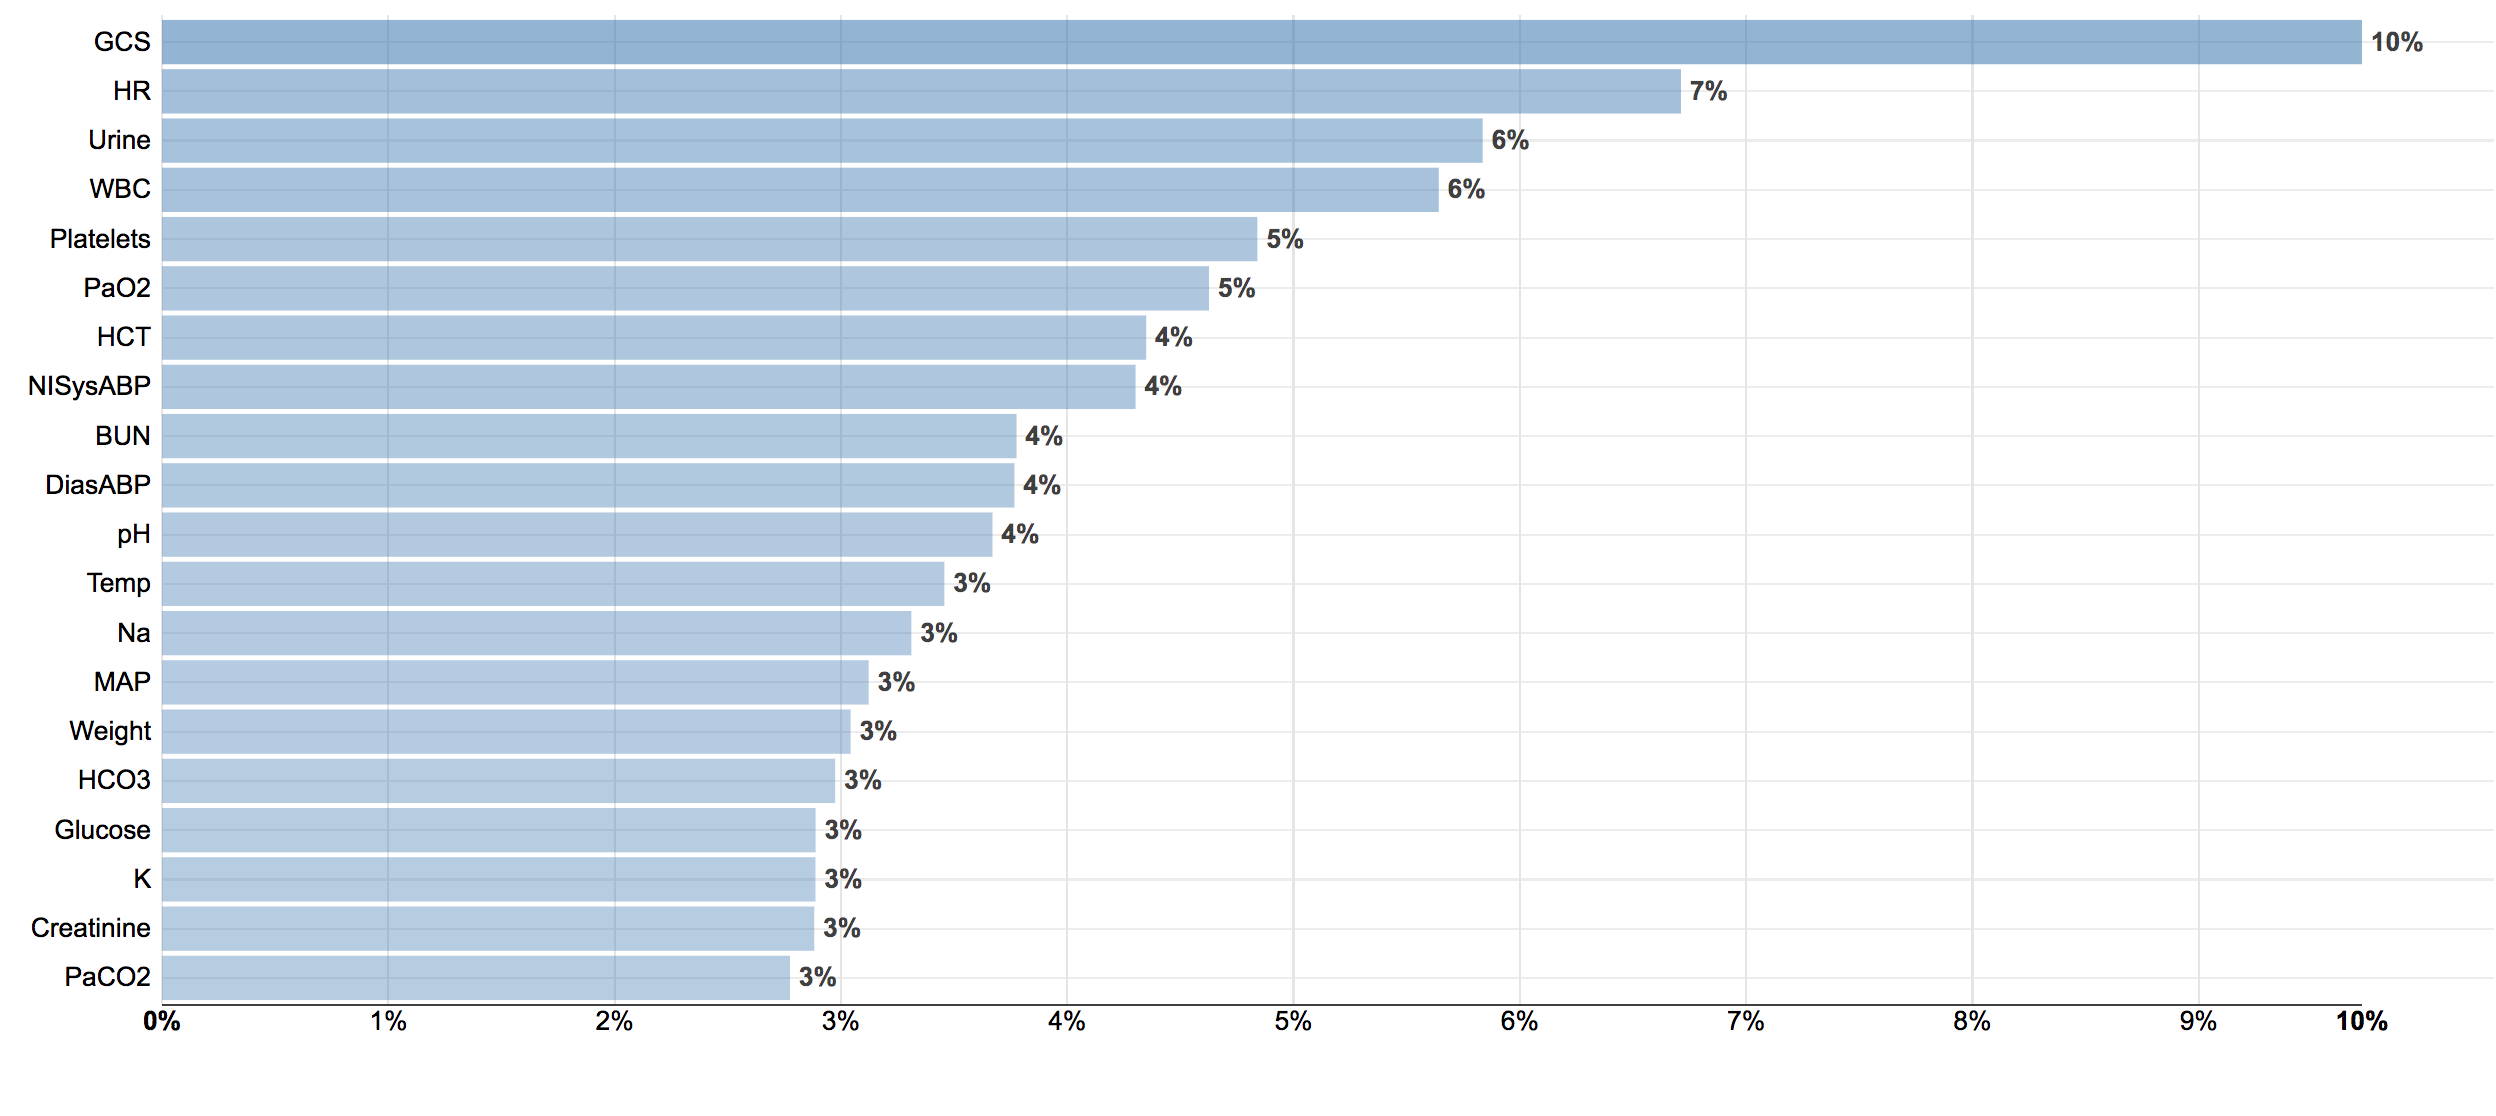

In [21]:
Image(filename = 'img/dataiku_1day_features.png', width = 1000)

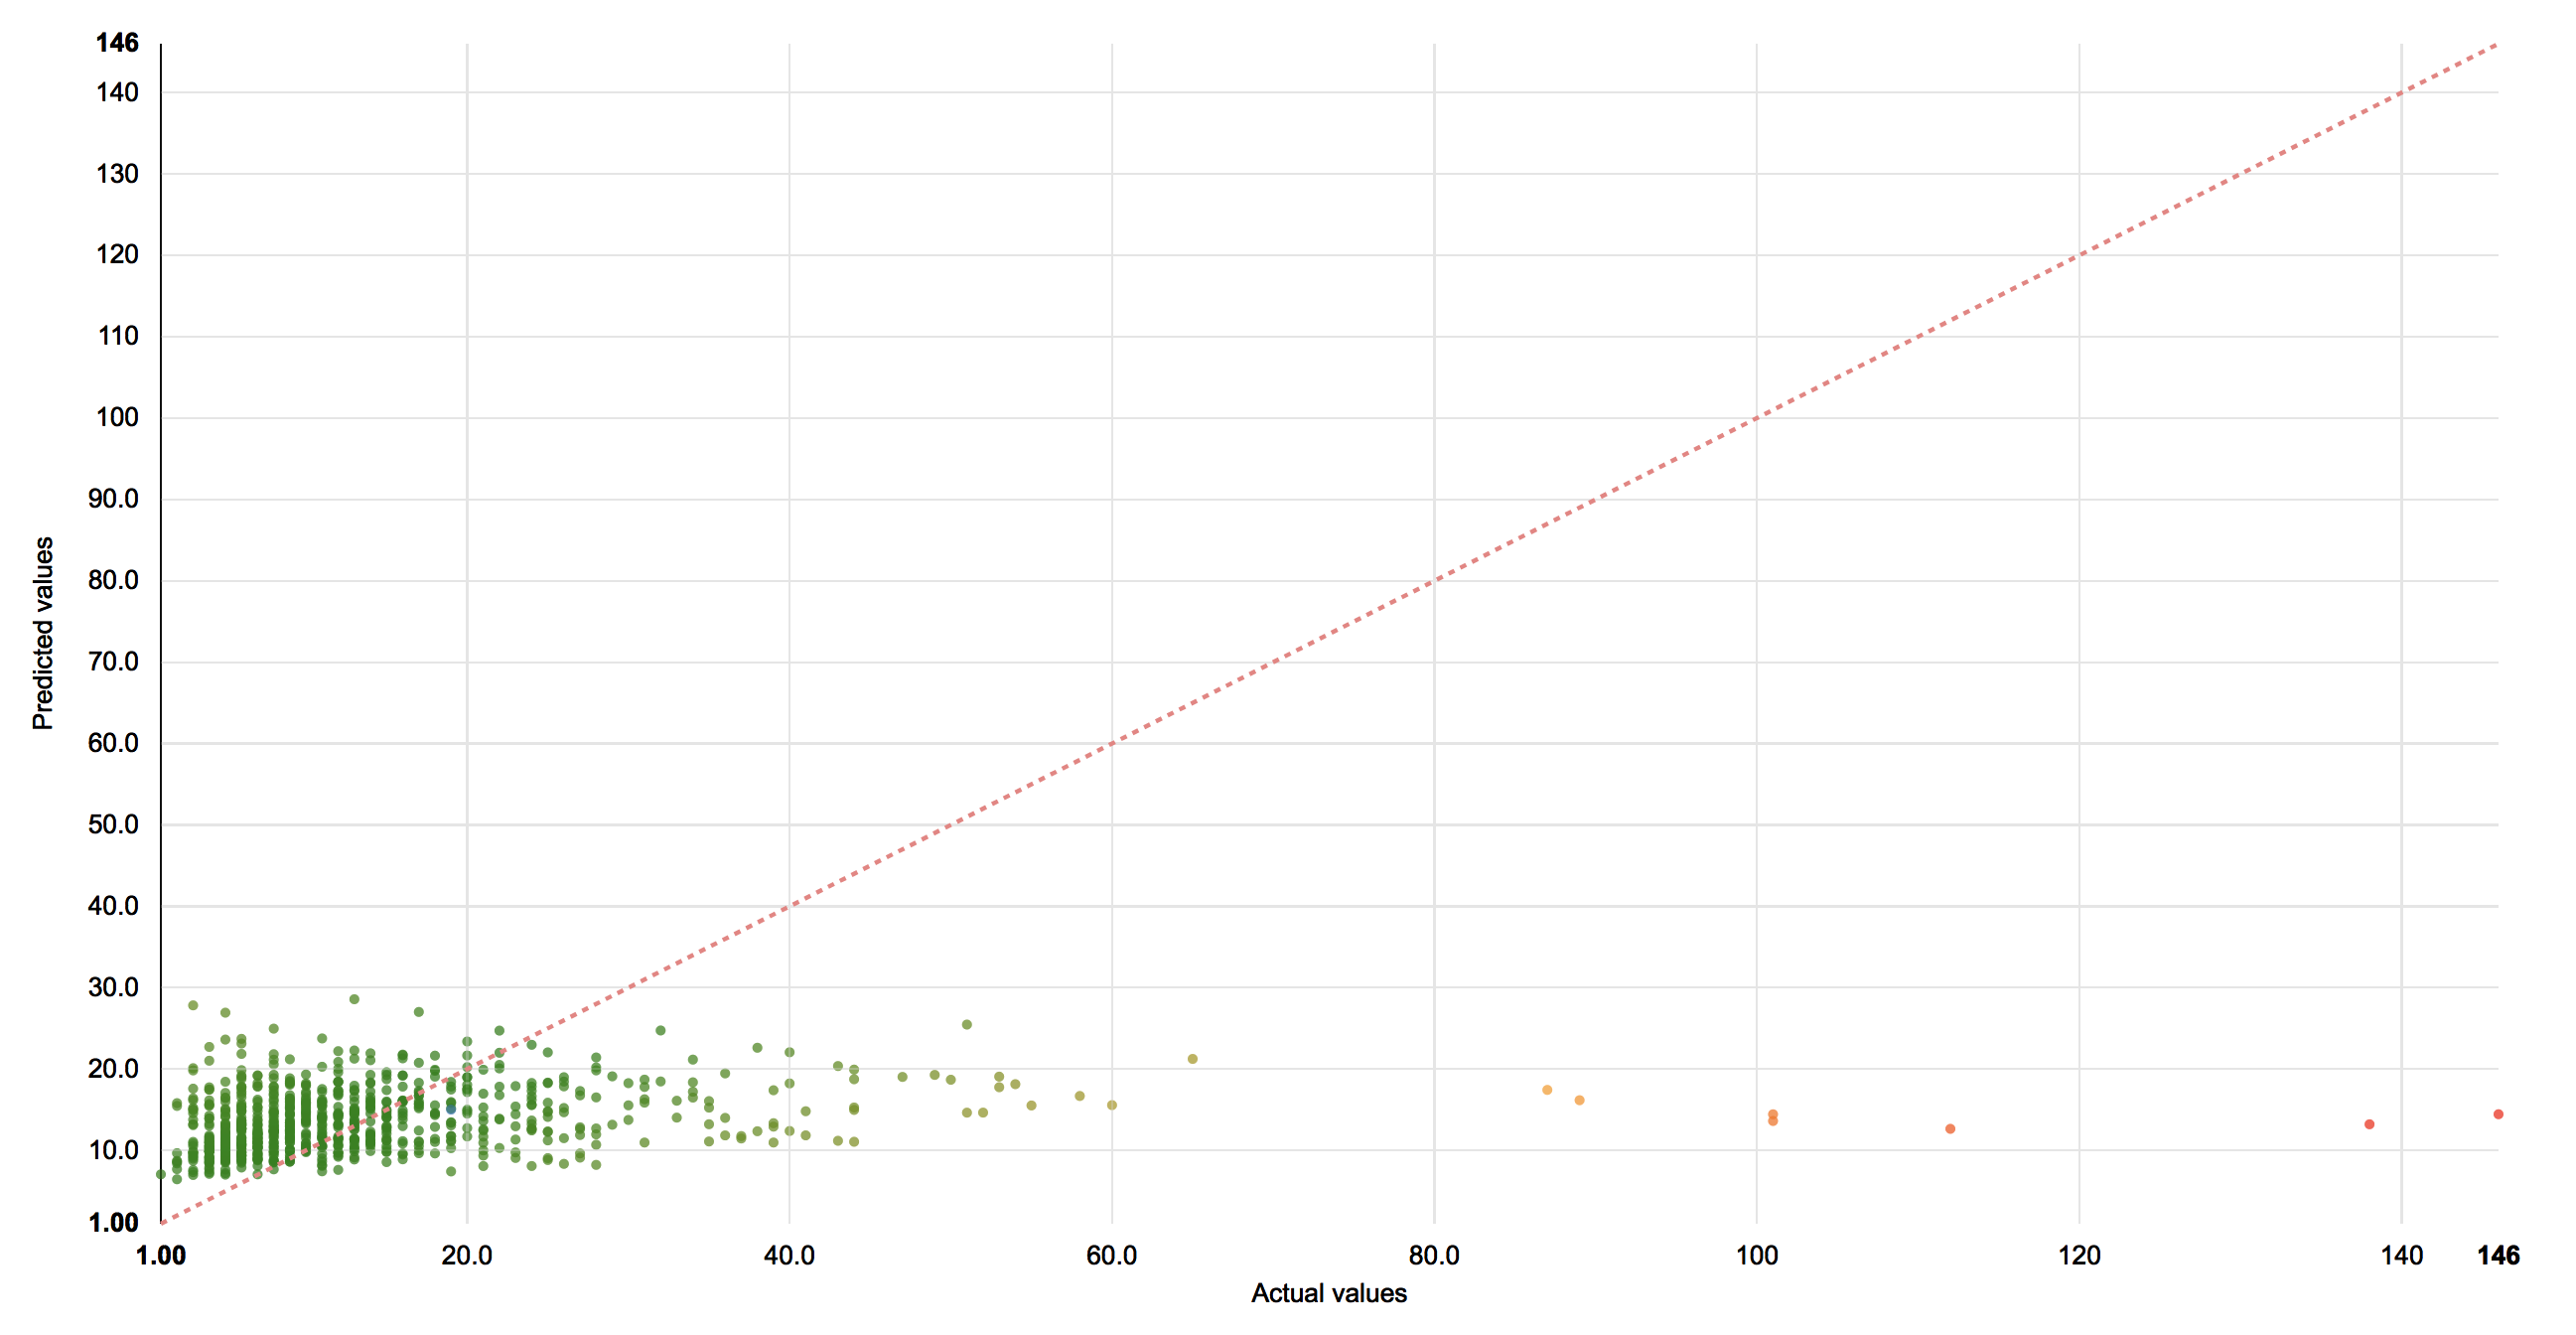

In [22]:
Image(filename = 'img/dataiku_1day_scatter.png', width = 1000)

## 9. Use Dataiku to explore models for 2day features


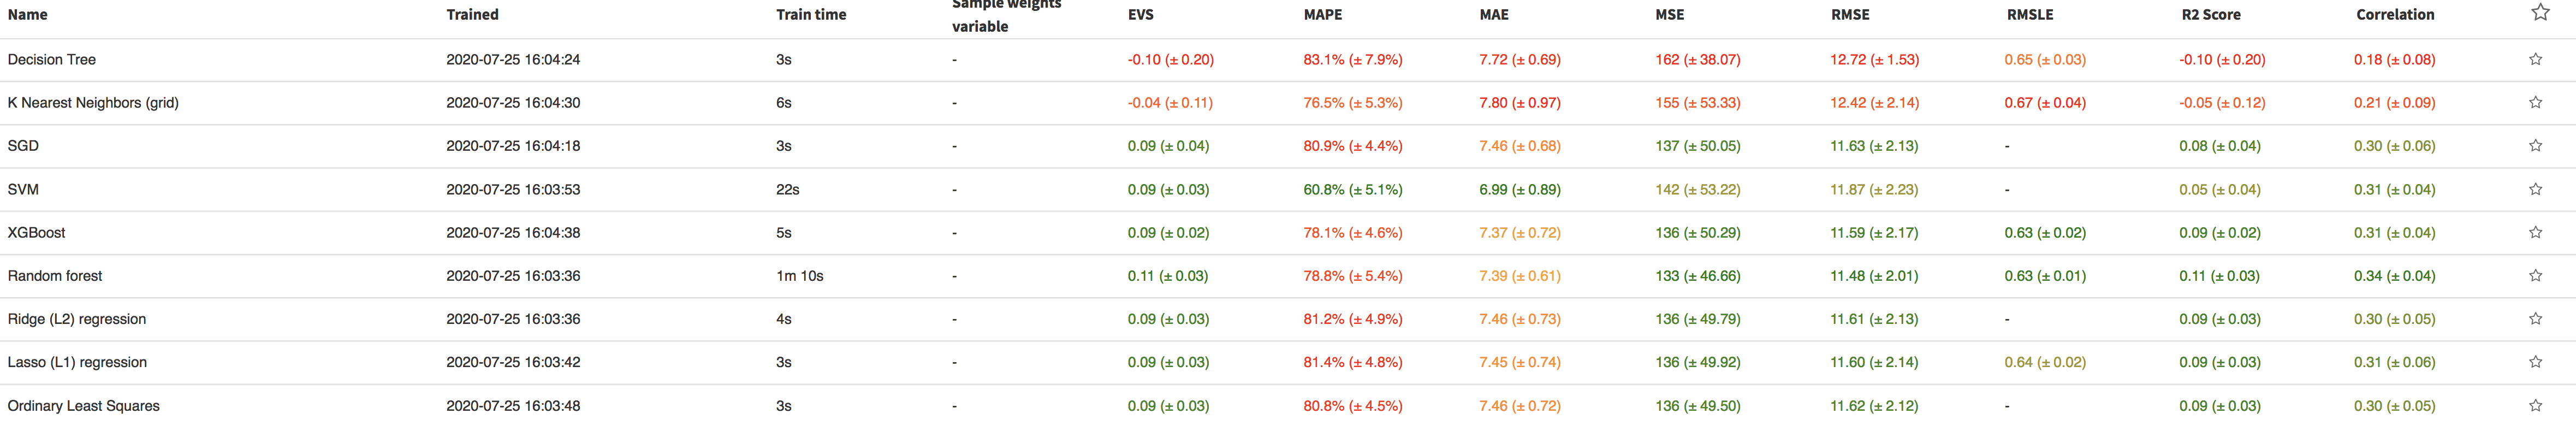

In [23]:
Image(filename = 'img/dataiku_2day_results.png', width = 1800)

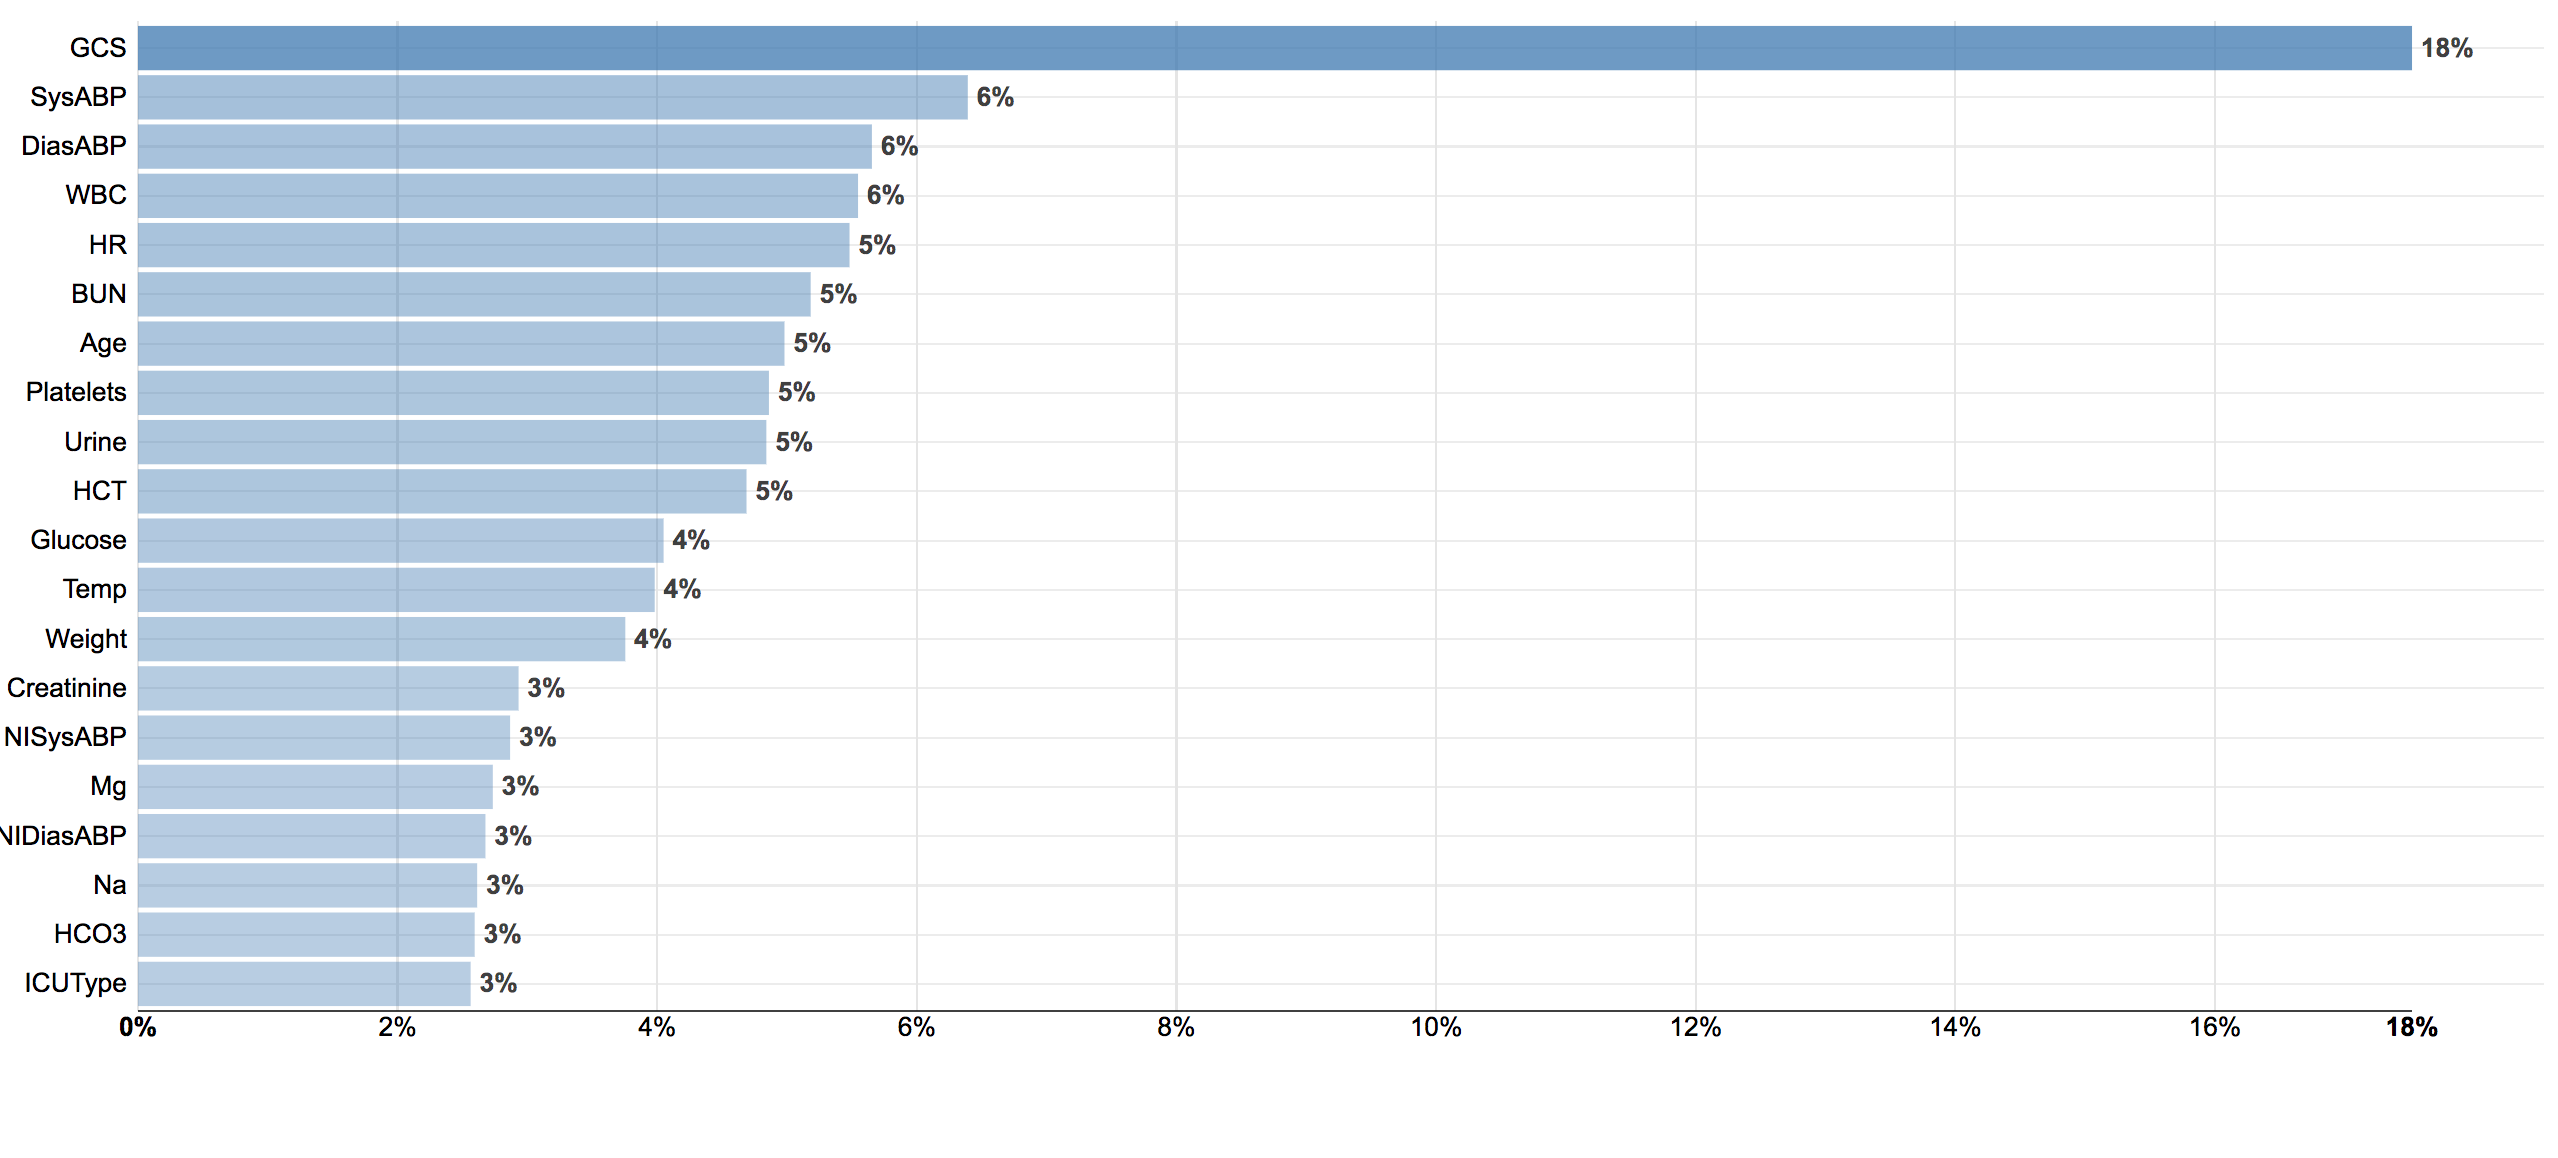

In [24]:
Image(filename = 'img/dataiku_2day_features.png', width = 1000)

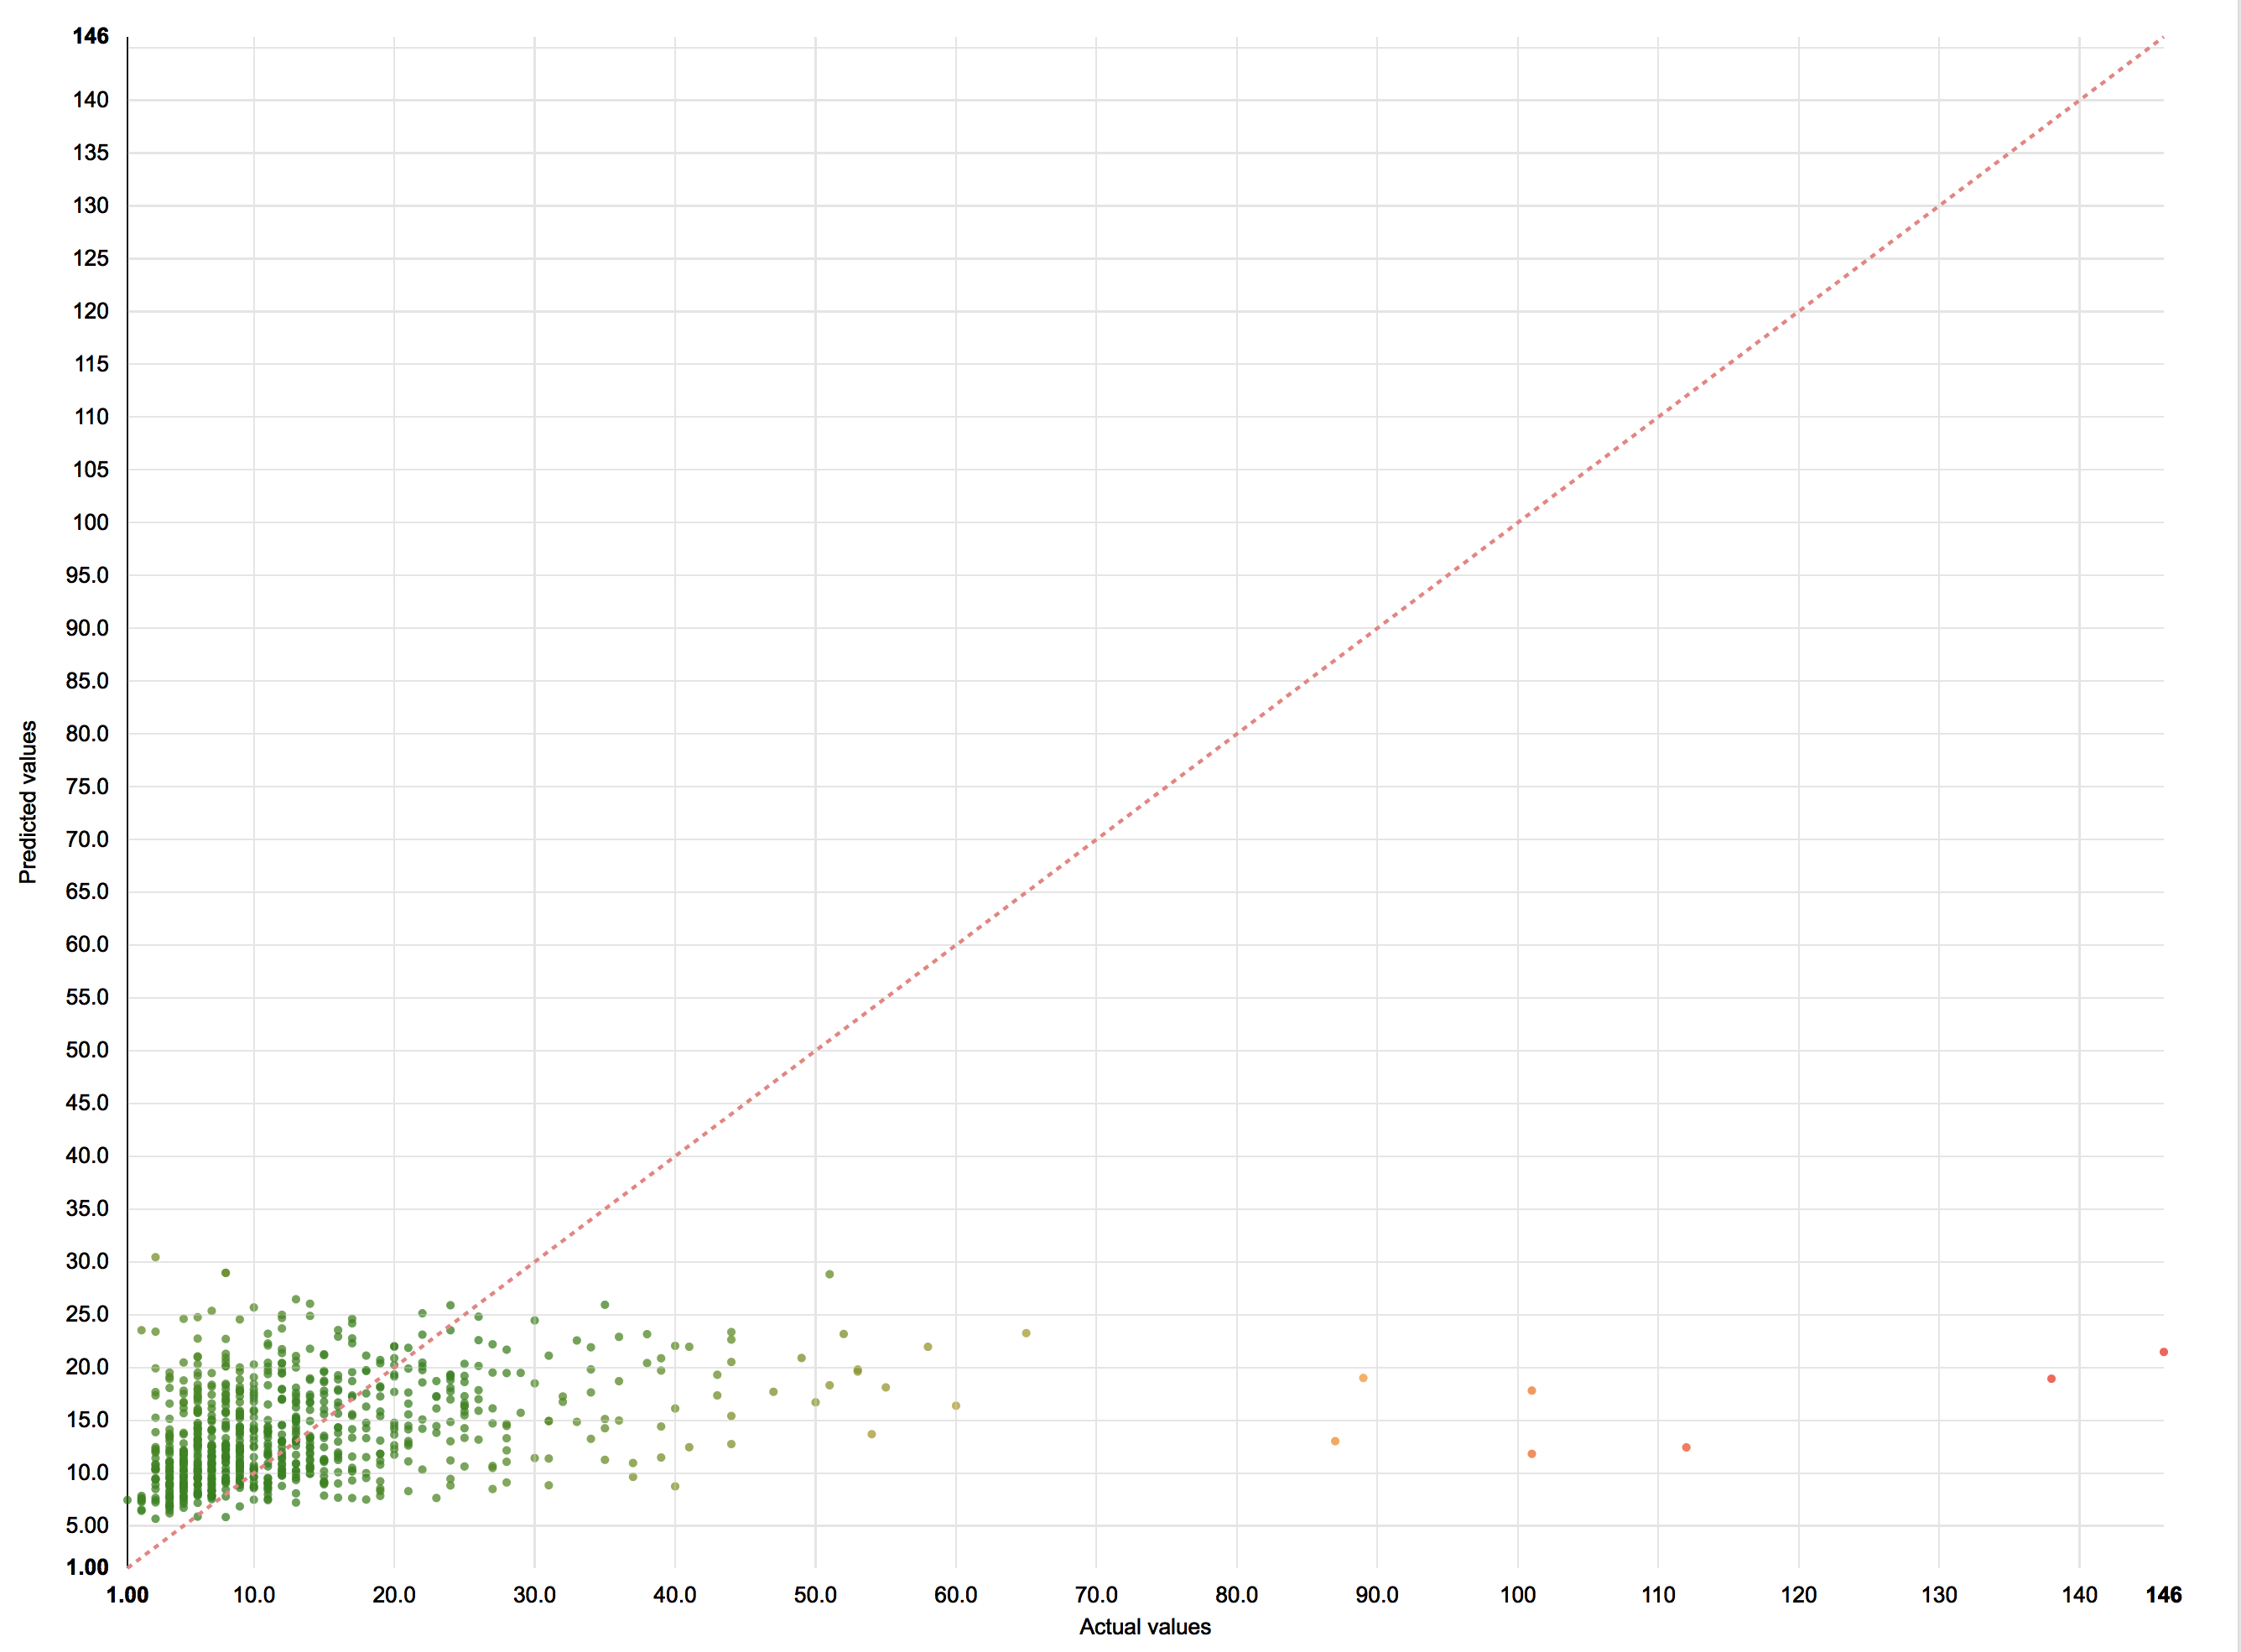

In [25]:
Image(filename = 'img/dataiku_2day_scatter.png', width = 1000)

### Discussion

* performance is better than day1 model but model still performs poorly
* feature importance is quite different from day1 model with the exception of GCS, HR, WBC

## Step 10: Classification Analysis

* Predict binary label - whether or not patient stay for longer than 2 weeks
* Regression didn't work well so classification is worth a shot 
* Optimize model for ROC AUC - general separation of 2 classes

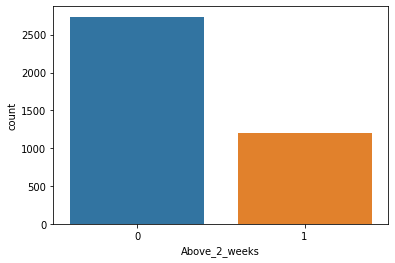

In [26]:
sns.countplot(df_train_nontime['Above_2_weeks'])


## Modeling results

269 estimators will be evaluated with 5 fold CV using grid search

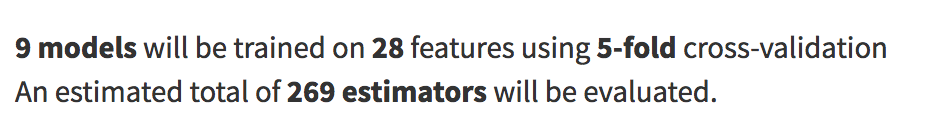

In [39]:
Image(filename = 'img/dataiku_classification_setup.png', width = 500)

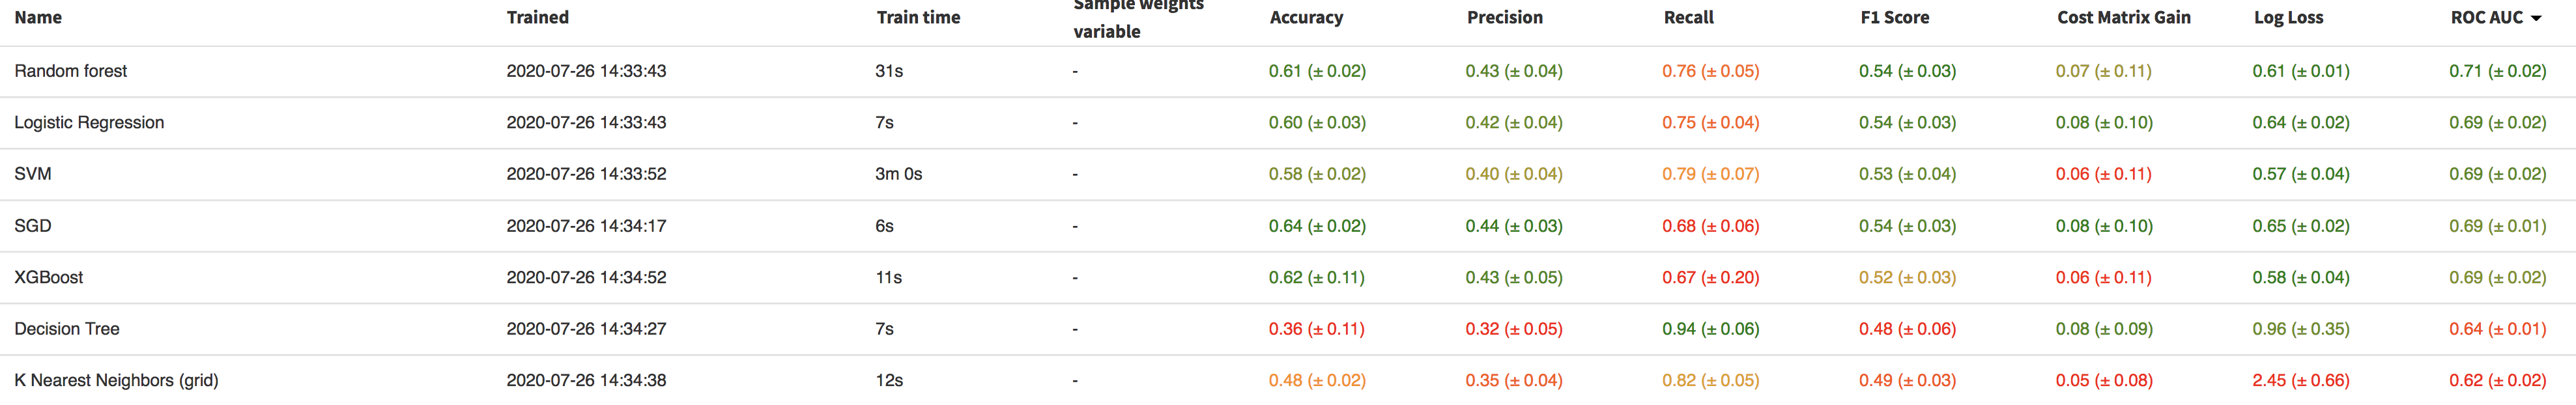

In [30]:
Image(filename = 'img/dataiku_classification_results.png', width = 1800)

### Best model is random forest as before

* decent separation of classes and ROCAUC is around .71 which is a decent starting point 

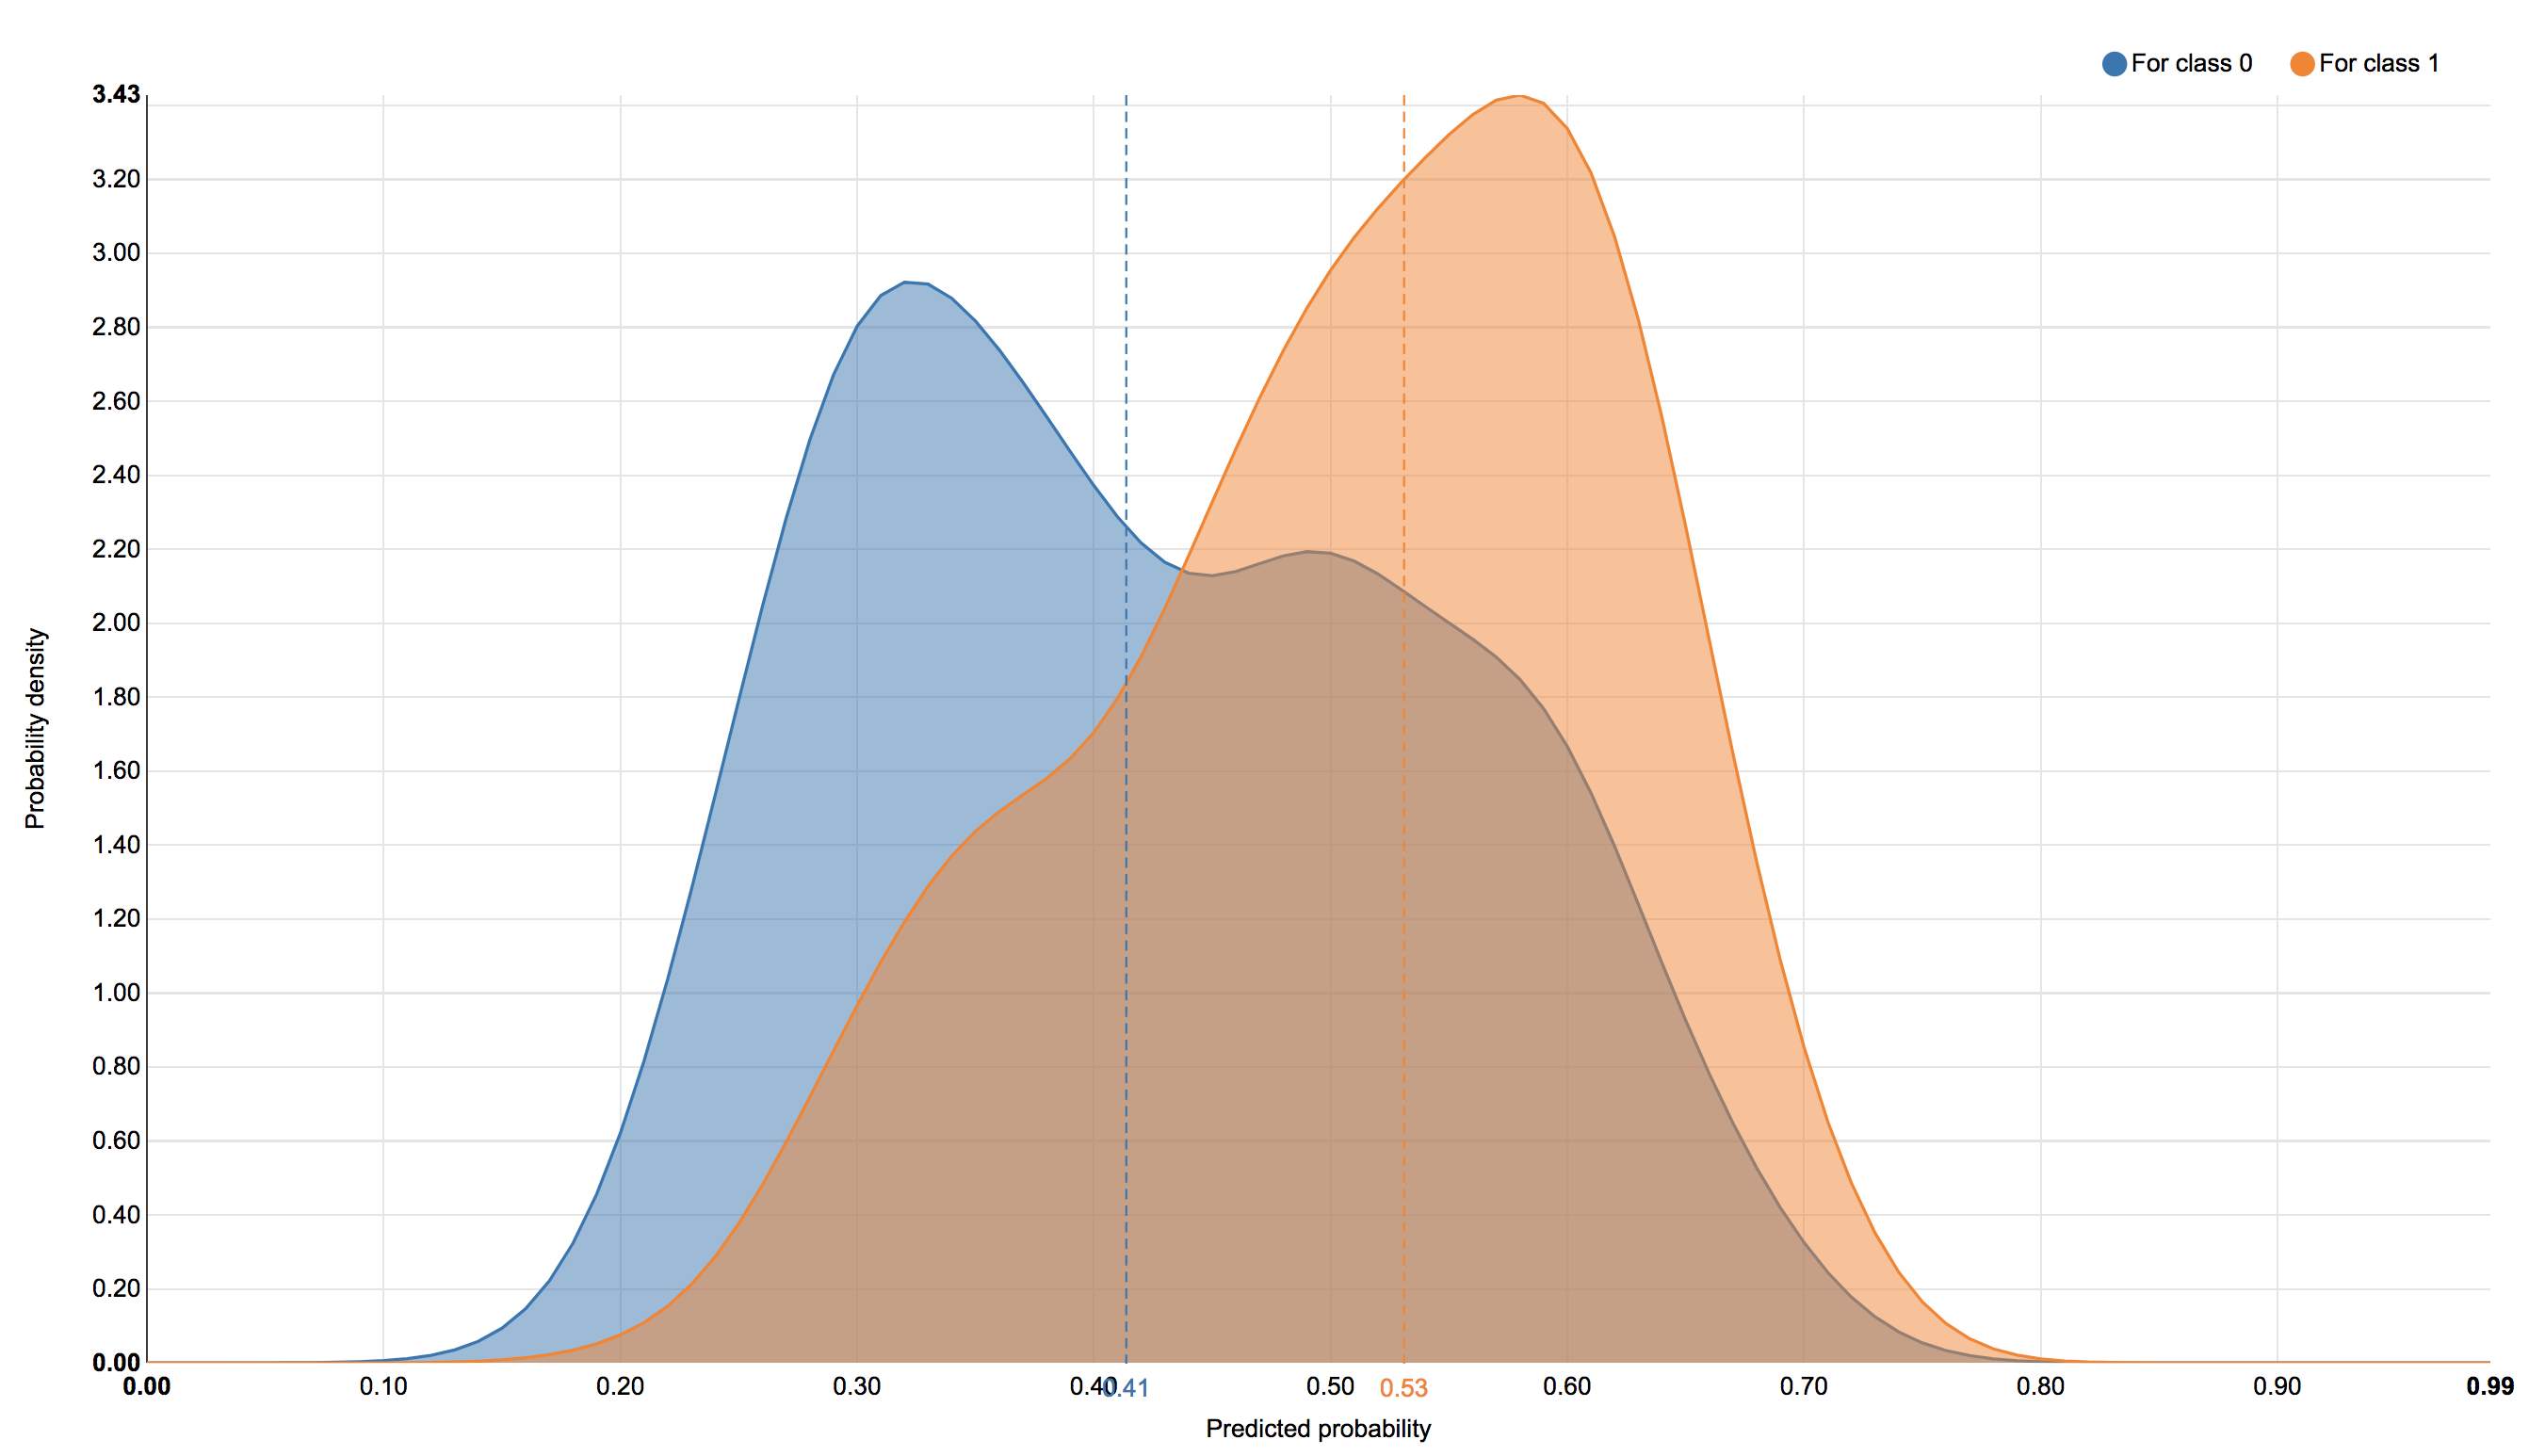

In [33]:
Image(filename = 'img/dataiku_classification_density.png', width = 800)

### Detailed classification metrics

* For optimal F1 score -the recall is pretty solid but precision lacks

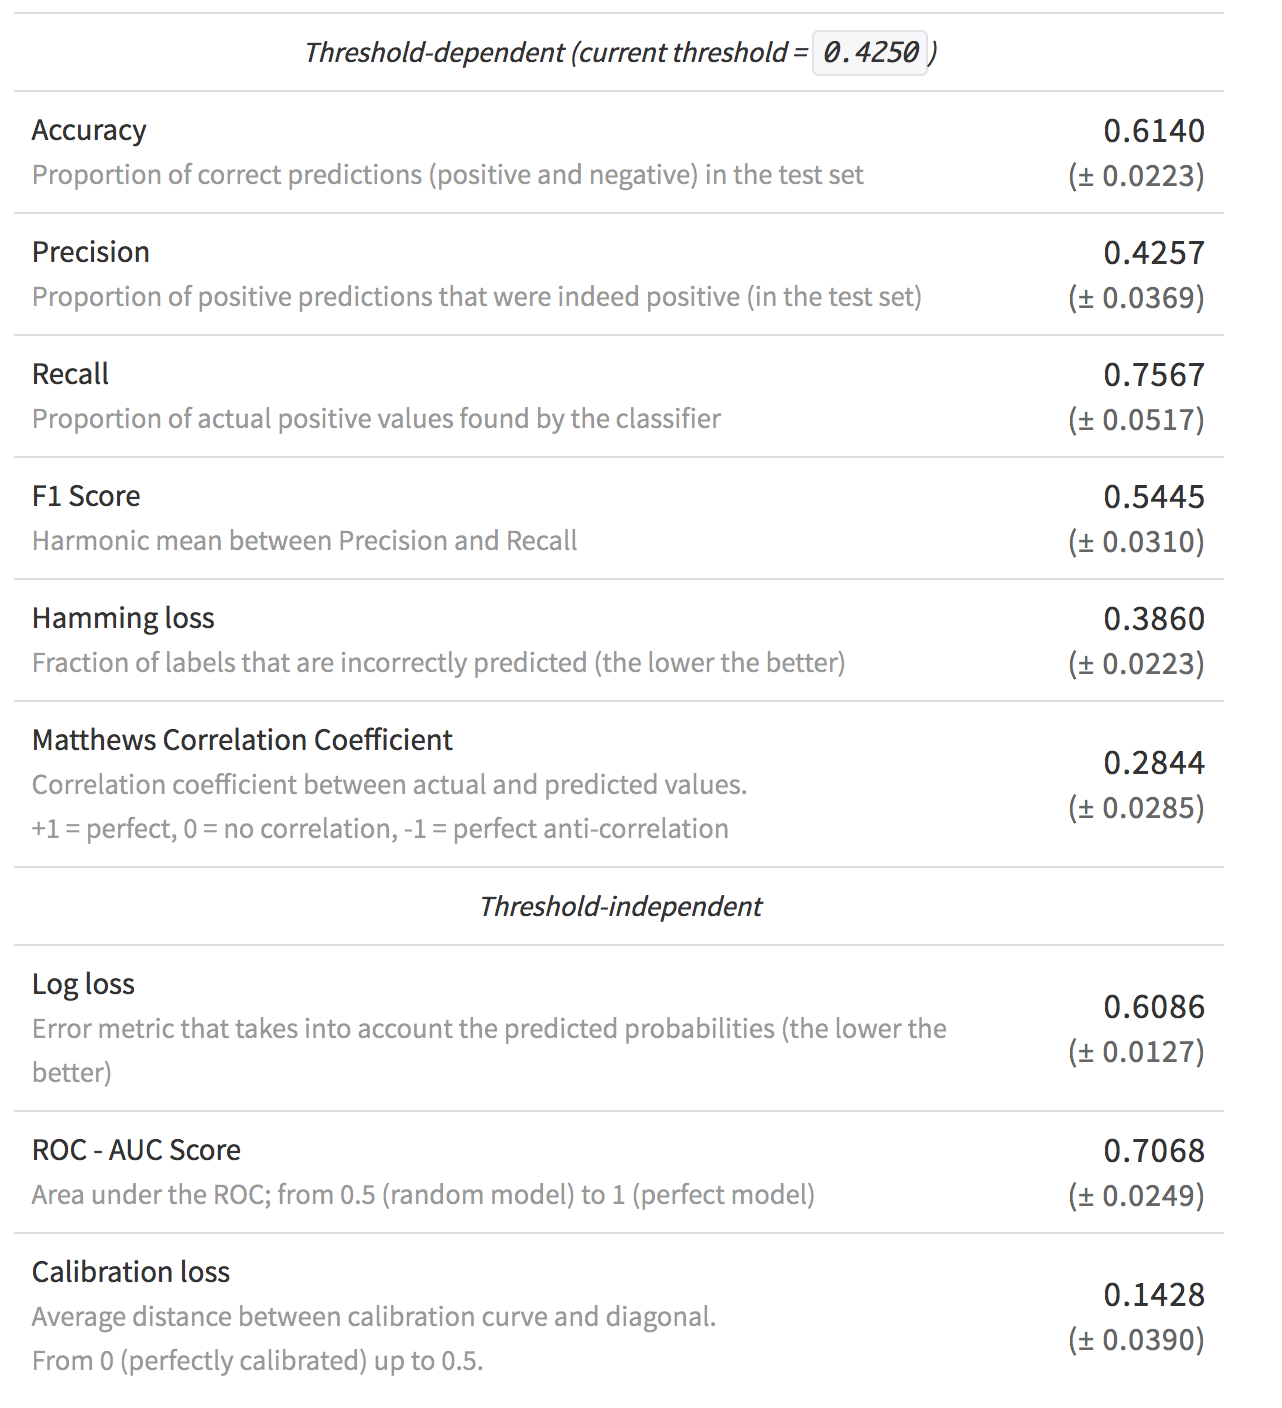

In [35]:
Image(filename = 'img/dataiku_classification_metrics.png', width = 600)

### steep tradeoff in recall vs precision which is what we see on the density chart as well. The best balance occurs at a threshold of .42 for f1 score

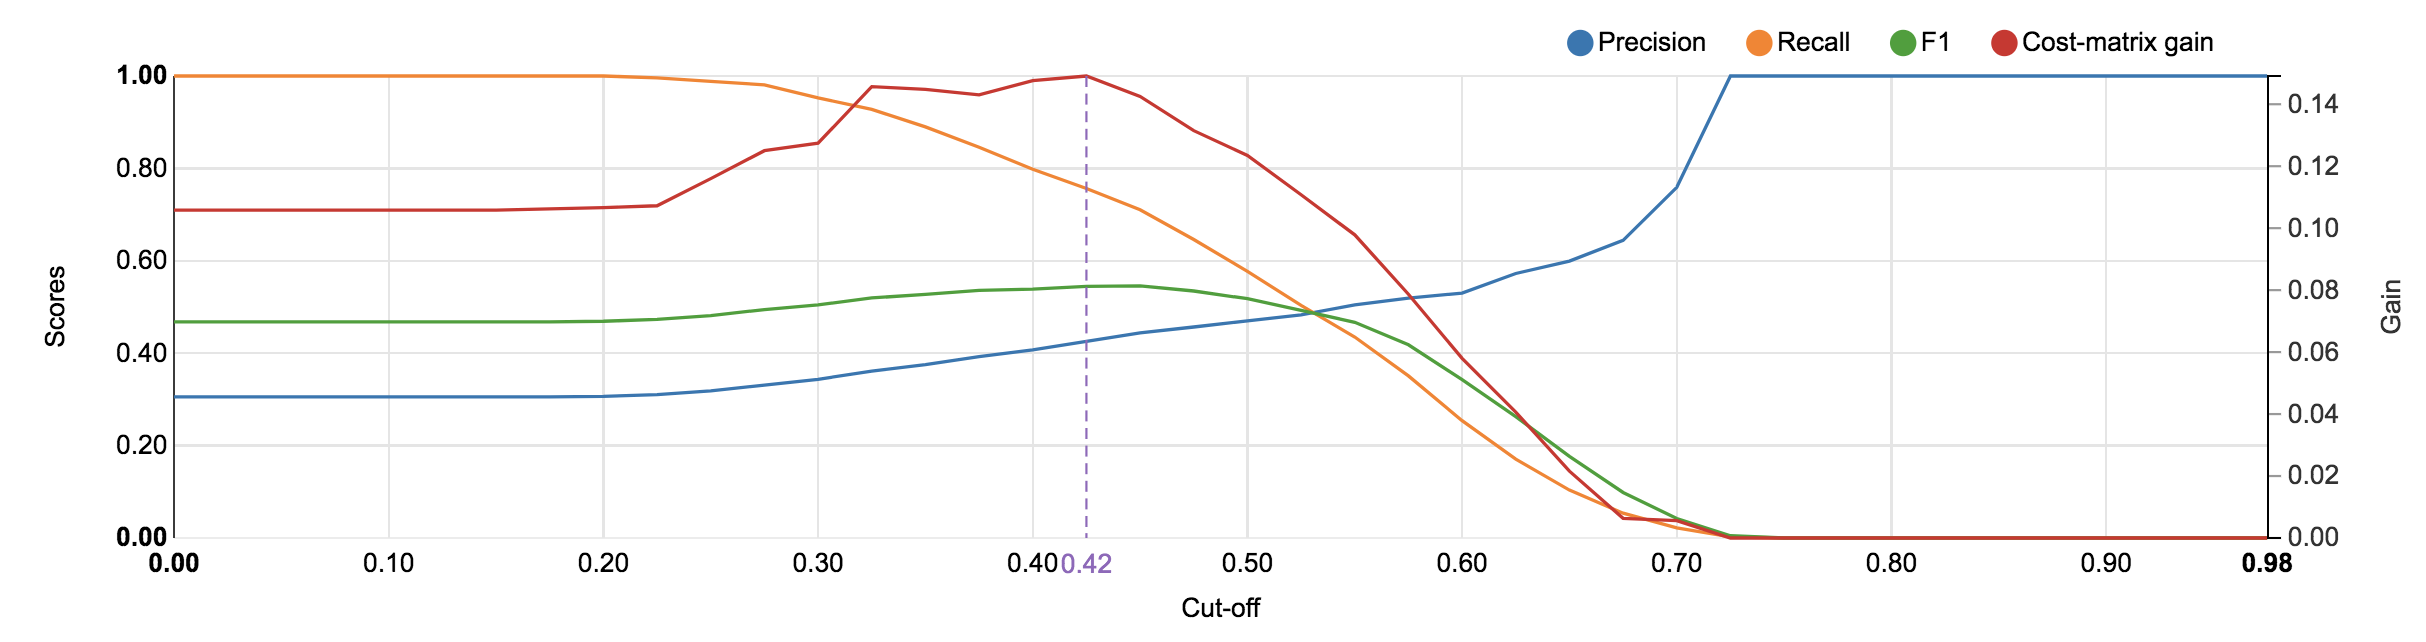

In [37]:
Image(filename = 'img/dataiku_classification_decision.png', width = 900)